# **Tensors**

**a. What Are Tensors?**

Tensors are a fundamental data structure in PyTorch used to encode the inputs and outputs of a model, as well as the model’s parameters. At their core, tensors are a generalization of matrices to higher dimensions. For example:

1. A 0-dimensional tensor is a single number (a scalar).
2. A 1-dimensional tensor is an array of numbers (a vector).
3. A 2-dimensional tensor is an array of arrays (a matrix).
4. Higher-dimensional tensors have 3 or more dimensions (e.g., a 3D tensor could represent a time series of image data).

b. **Why Are Tensors Useful?**

1. Efficiency: Tensors are designed to be efficient for numerical computation. They can be stored in GPU memory, allowing PyTorch to perform computations on them massively in parallel, resulting in significant speedups.
2. Autograd: PyTorch tensors support automatic differentiation, which is essential for training neural networks. This means that PyTorch can automatically compute gradients for tensor operations, which are used to optimize the model during training.
3. Interoperability: Tensors are interoperable with other popular numerical computing libraries like NumPy. This makes it easy to import data, perform preprocessing, and even leverage other libraries' functionalities.

c. **Structure and Common Operations**

1. Creation

In [20]:
import torch

x = torch.tensor([1, 2, 3])  # Directly from data
y = torch.zeros([2, 2])  # Uninitialized tensor of zeros with shape 2x2
z = torch.rand([3, 3])  # Randomly initialized tensor of shape 3x3

# Defining a 2D tensor directly from data
x_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Defining a 3D tensor directly from data
x_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])

# Printing the 2D tensor
print("2D Tensor:")
print(x_2d)

# Printing the 3D tensor
print("\n3D Tensor:")
print(x_3d)

2D Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])

3D Tensor:
tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])


2. Shape

In [21]:
print(x.shape)

torch.Size([3])


3. Can hold multiple data types

In [22]:
a = torch.FloatTensor([1.0, 2.0])  # A tensor of floats
b = torch.LongTensor([1, 2, 3])  # A tensor of integers

4. Operations

In [ ]:
# Mathematical operations
c = x + y  # Element-wise addition

# Reshaping
d = y.view(4)  # Reshapes y to a 1D tensor of 4 elements

# Indexing
e = z[0, :]  # Selects the first row of z

5. GPU support

In [ ]:
if torch.cuda.is_available():
    x = x.to('cuda')  # Moves x to GPU

d. **Storing images in tensors**

An image can be thought of as a grid of pixels, where each pixel contains values representing its color.

1. Grayscale Images: A single-channel grayscale image can be stored in a 2D tensor with shape (Height, Width), where each element of the tensor represents the intensity of a pixel.
2. Color Images: A color image is stored in a 3D tensor with shape (Channels, Height, Width). The first dimension, "Channels", typically has a size of 3, corresponding to the RGB color channels. Each element in this tensor represents the intensity of red, green, or blue at a particular pixel.
3. Batch of Images: When processing multiple images at once (as is common in deep learning), a 4D tensor is used, with shape (Batch size, Channels, Height, Width). This allows for batch processing of images, significantly improving computational efficiency.

In [23]:
# Simulating a 32x32 RGB image
image = torch.rand(3, 32, 32)  # Random values to simulate pixel intensities

# Simulating a batch of 64 32x32 RGB images
batch = torch.rand(64, 3, 32, 32)  # Random values for the sake of example

e. **Advantages**

1. **Vectorized Operations:** Operations applied simultaneously to multiple elements, leading to significantly faster computation than iterating through pixels one by one.

2. **GPU Acceleration:** Tensors are designed to be used on GPUs, which can perform many operations in parallel. This is particularly beneficial for operations on images, which can be computationally intensive.

3. **Automatic Differentiation:** You automatically gain the ability to use PyTorch's autograd system for computing gradients. This is essential for training neural networks on image data.

4. **Memory Efficiency:** Storing and manipulating images as tensors is memory-efficient, especially when using specialized tensor data types (e.g., float16 for GPUs), reducing the memory footprint of your models and data.

5. **Batch Processing:** The ability to process batches of images in a single tensor operation greatly reduces the time needed for training and inference, as the overhead of the operation is distributed over many images.

## What is Pytorch's Autograd?

It provides automatic differentiation for all operations on tensors. When you perform operations on tensors while creating a model, PyTorch tracks these operations to create a computational graph.

When computing the gradients, PyTorch goes backward through this graph, applying the chain rule to compute the gradient of each tensor with respect to the tensors it depends on.

**Key Concepts and Attributes**

1. PyTorch tensors have an attribute called **.requires_grad**; setting this attribute to True tells PyTorch to start tracking all operations on it. When you finish your computation, you can call **.backward()** on a tensor (usually on a scalar result of your computation, such as the loss in a neural network) to compute all gradients automatically. The gradient for this tensor will accumulate into the **.grad** attribute.

2. After computing the gradients using **.backward()**, you can perform gradient descent to update the weights. This step is typically done with a PyTorch optimizer like torch.optim.SGD or torch.optim.Adam.

3. If you want to stop a tensor from tracking history, you can call **.detach()** to detach it from the computation history, preventing future computation from being tracked.

(Computational Graph is a dynamically created graph that records the sequence of operations that have been applied to tensors. It's used by autograd to compute gradients.)

In [24]:
# Create tensors.
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

# Compute gradients.
out.backward() # This line computes the gradient of out with respect to x using the backward pass.

# Print gradients d(out)/dx.
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


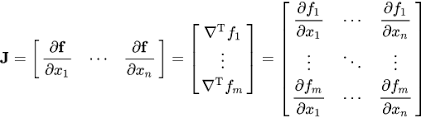

Image source: https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant

f(x) = 1/4 * 3 * (x + 2)^2

f′(x)=3/2∗(x+2)

# **MLP**

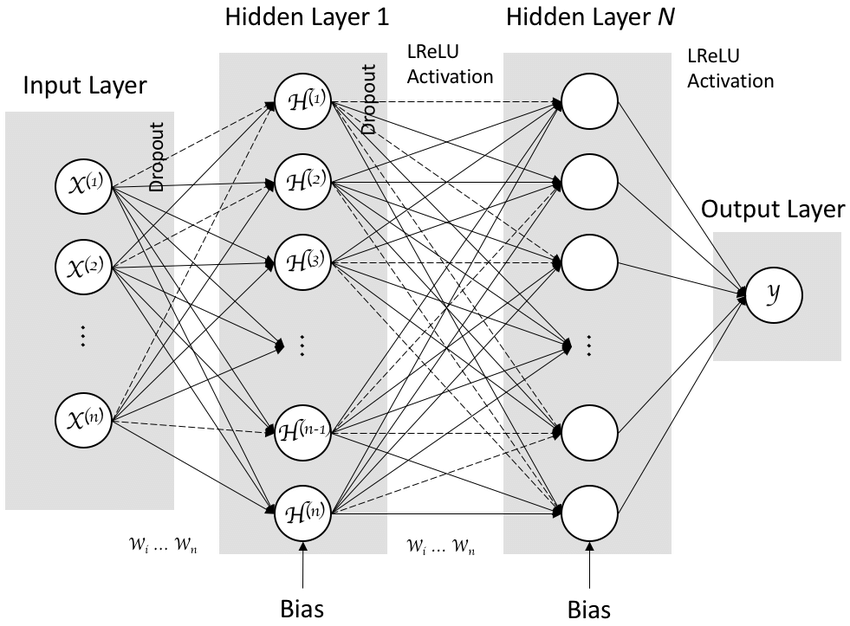

Image source: https://www.researchgate.net/figure/MLP-deep-learning-architecture_fig5_321341597

Multi-Layer Perceptrons (MLPs) are a class of artificial neural networks that consist of at least three layers of nodes or neurons: an input layer, one or more hidden layers, and an output layer. Unlike a single-layer perceptron, MLPs can capture non-linear relationships between inputs and outputs through the use of multiple layers and non-linear activation functions applied at the nodes of the hidden layers.

MLPs are versatile and can be used for a wide range of tasks in machine learning and deep learning. Some common use cases include:

1. **Classification**: MLPs can be used for binary classification (e.g., spam or not spam) and multi-class classification problems (e.g., classifying images into categories).

2. **Regression:** MLPs can predict continuous values (e.g., predicting house prices based on features like size and location).

3. **Pattern Recognition**: They are used for recognizing patterns and sequences in data, like handwriting or speech recognition, albeit with limitations compared to more advanced architectures like CNNs or RNNs.

## Digit classification using MLPs

The MNIST dataset contains 10 classes, representing the digits 0 through 9, with a total of 70,000 images, divided into 60,000 training images and 10,000 test images.

### 1. Import necessary libraries

In [13]:
import torch  # Main PyTorch library
import torch.nn as nn  # Submodule containing neural network layers and functions
import torch.nn.functional as F  # Functional interface containing typical operations used for building neural networks like activations and loss functions
import torch.optim as optim  # Submodule to access optimizers
from torchvision import datasets, transforms  # Utilities to load datasets and perform common image transformations
from torch.utils.data import DataLoader  # Utility to batch, shuffle and load data in parallel
import matplotlib.pyplot as plt  # Library for plotting, will be used to show images

### 2. Load and Prepare the Data

In [31]:
# Transform to normalize the data, essential for model convergence
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts a PIL Image or numpy.ndarray to tensor.
    transforms.Normalize((0.5,), (0.5,))  # Normalizes a tensor image with mean and standard deviation: [0, 1] to [-0.5, 0.5]
])

# Download and load the training data, applying transformations
train_set = datasets.MNIST('', download=True, train=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)  # Loader for training data

# Download and load the test data
test_set = datasets.MNIST('', download=True, train=False, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)  # Loader for test data

a. Why do we convert to tensors?

b. Why do we need to normalize the image?

c. What is a dataloader?

d. What is a batch size?

#### Answers

* Dataset is an object that holds your data, allowing you to access individual items efficiently.

* PyTorch has built-in support for many common datasets through its torchvision, torchaudio, and torchtext libraries, for vision, audio, and text data, respectively. You can also create custom datasets by inheriting from the Dataset class and implementing the __len__ method (which returns the size of the dataset) and the __getitem__ method (which returns a single item from the dataset).

* A DataLoader in PyTorch takes a Dataset and allows you to iterate over it in an efficient way (batch, shuffle, load in parallel)

* Example: Let's say you're training a neural network to identify different types of fruits from images. Your Dataset -- a huge album of fruit images, where each page contains an image and its label (e.g., "apple", "banana"). Now, you decide to use a DataLoader to train your model. You set the batch size to 32, meaning your model doesn’t learn from individual images one by one but instead learns from 32 images at a time. This is more efficient and helps the model to generalize better from the diverse set of examples in each batch. Furthermore, by enabling shuffling, you ensure that the model doesn’t get biased by the order of the images. Finally, by utilizing multiple workers, you parallelize the process of loading and transforming images, which can significantly speed up training, especially when dealing with large datasets and complex transformations.

* Normalizing images - faster convergence, better weight initialization (by ensuring all features are on a similar scale)

* Batch size - When the batch size is set to 1, the model updates its weights after processing each individual sample (SGD). It can lead to very noisy updates, but it also helps to avoid local minima during training. Mini-batch: batch size is set to a value greater than 1 but less than the total number of samples in the dataset (balances efficiency and stochasticity). Batch: batch size equals the total number of samples in the dataset- the gradient and hence the update are computed based on the whole dataset- computationally very expensive.



### 3. Define the MLP model

In [32]:
class MLP(nn.Module):  # Define the MLP class that inherits from nn.Module
    def __init__(self):
        super(MLP, self).__init__()  # Initialize the superclass
        self.fc1 = nn.Linear(28*28, 128)  # First fully connected layer, input to hidden layer
        self.fc2 = nn.Linear(128, 64)     # Second fully connected layer, hidden to hidden layer
        self.fc3 = nn.Linear(64, 10)      # Third fully connected layer, hidden to output layer

    def forward(self, x):  # Defines the computation performed at every call
        x = x.view(-1, 28*28)  # Flatten the image tensor -- reshaped to have 28*28 columns, and -1 is used to let PyTorch infer the number of rows
        x = F.relu(self.fc1(x))  # Pass through first layer and apply ReLU
        x = F.relu(self.fc2(x))  # Pass through second layer and apply ReLU
        x = self.fc3(x)  # Pass through third layer
        return F.log_softmax(x, dim=1)  # Apply log softmax to output

Why do we use activation fxns?

### 4. Instantiate the Model, Define the Loss Function and Optimizer

In [33]:
model = MLP()  # Create an instance of our MLP class
criterion = nn.CrossEntropyLoss()  # Define the loss function (CrossEntropyLoss is common for classification)
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)  # Define the optimizer (Stochastic Gradient Descent)

### 5. Train the Model

An epoch represents a single pass through the entire training dataset by the learning algorithm. One epoch means that every sample in the training dataset has been used once to update the model's parameters. Training a model for multiple epochs implies cycling through the dataset multiple times, with the hope that with each pass, the model's performance improves as it learns from the data.

In [34]:
epochs = 15  # Number of passes through the entire dataset
for epoch in range(epochs):  # Loop over the dataset multiple times
    running_loss = 0
    for images, labels in train_loader:  # Loop through batches of data in the train_loader
        optimizer.zero_grad()  # Zero the parameter gradients to prevent accumulation

        # Forward pass
        output = model(images)  # Compute the model output
        loss = criterion(output, labels)  # Calculate loss

        # Backward pass and optimize
        loss.backward()  # Compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        running_loss += loss.item()  # Sum up loss for reporting

    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")  # Print average loss per epoch

Epoch 1 - Training loss: 0.6354644203951745
Epoch 2 - Training loss: 0.28466026619203816
Epoch 3 - Training loss: 0.22221966286394387
Epoch 4 - Training loss: 0.17701118869154947
Epoch 5 - Training loss: 0.14911094699293248
Epoch 6 - Training loss: 0.12872037676566128
Epoch 7 - Training loss: 0.11399425623088535
Epoch 8 - Training loss: 0.10065282666896865
Epoch 9 - Training loss: 0.08915184196263456
Epoch 10 - Training loss: 0.0814573840855726
Epoch 11 - Training loss: 0.07548464801031421
Epoch 12 - Training loss: 0.06854516379872778
Epoch 13 - Training loss: 0.06370256779226921
Epoch 14 - Training loss: 0.05805535761685148
Epoch 15 - Training loss: 0.053260008495714044


a. What is an epoch?

b. What is optimizer.zero_grad?

c. Where are the gradients stored?

d. What is loss.item()?

##### Answers

* An epoch represents a single pass through the entire training dataset by the learning algorithm. One epoch means that every sample in the training dataset has been used once to update the model's parameters. Training a model for multiple epochs implies cycling through the dataset multiple times, with the hope that with each pass, the model's performance improves as it learns from the data.

* **optimizer.zero_grad()** is a method call in PyTorch that clears (resets to zero) the gradients of all the model parameters. This is necessary because by default, gradients accumulate in PyTorch tensors for every backward pass. If we didn't clear the gradients, the gradient computations from subsequent backward passes would be added to the existing gradients, leading to incorrect updates to the model parameters.

* In PyTorch, gradients are stored in the .grad attribute of tensors (specifically, those tensors that have their requires_grad attribute set to True).

* loss.item() is a method in PyTorch used to extract the scalar value of a tensor containing a single value. Calling .item() on the loss tensor converts it into a standard Python number.

* Why do we need epochs? A single epoch allows the model to see and learn from every sample in the training dataset once. Multiple epochs ensure that this learning process is repeated, allowing the model to learn more comprehensively from the variability present in the entire dataset.

### 6. Evaluate the Model

In [35]:
correct_count, all_count = 0, 0
for images,labels in test_loader:  # Iterate over the test dataset
    for i in range(len(labels)):
        with torch.no_grad():  # Temporarily set all requires_grad flag to false -- disables gradient calculation
            logps = model(images[i].view(1, 784))  # Compute the model output

        ps = torch.exp(logps)  # Calculate the probabilities for each class
        probab = list(ps.numpy()[0])  # Convert probabilities to numpy list
        pred_label = probab.index(max(probab))  # Find the predicted class label
        true_label = labels.numpy()[i]  # Extract the true class label
        if(true_label == pred_label):
            correct_count += 1  # Increment correct count if prediction is correct
        all_count += 1

print("Model Accuracy =", (correct_count/all_count))  # Print the accuracy of the model

Model Accuracy = 0.975


a. Why torch.no_grad()?

b. When to use torch.no_grad vs model.eval()?

#### Answers

* torch.no_grad(): Disables gradient calculation to save memory and computations when you are sure you will not call .backward(). It is useful not only during inference but also when you need to perform certain operations on tensors during training where gradients should not be calculated or stored.

* model.eval(): This is a method you call on your model before inference to set the model to evaluation mode. Unlike torch.no_grad(), which is focused on disabling gradient computation, model.eval() changes the behavior of specific layers to be more suitable for inference. For example: BatchNorm Layers: In training mode, BatchNorm layers use the statistics of the current batch to normalize the data. In eval mode, BatchNorm layers use the running statistics accumulated during training to keep the normalization consistent. Dropout Layers: Dropout layers randomly zero some of the input units during training to prevent overfitting. In eval mode, Dropout layers are deactivated, and all units are used as is.

* Use model.eval() when you need to perform inference, i.e., when you are evaluating your model on validation or test data. This ensures the model behaves correctly regarding BatchNorm, Dropout, and other layers that have different behavior during training vs. inference. Use torch.no_grad() when you want to perform operations that should not affect gradients. This can be during inference (wrapped around your call to the model for predictions) or even during training if you're performing certain computations where gradients aren't needed.


```python
model.eval()
with torch.no_grad():
    # perform inference
    outputs = model(inputs)
    

### 7. Display some samples

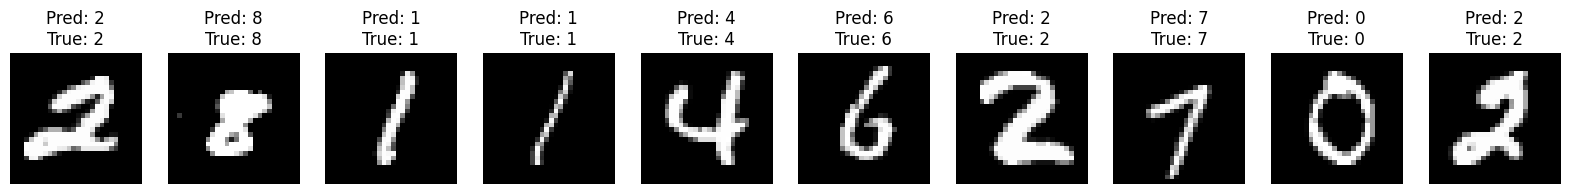

In [36]:
# Set the model to evaluation mode
model.eval()

# Choose a small number of images to display
images_to_display = 10
fig, axes = plt.subplots(1, images_to_display, figsize=(20, 4))

# Randomly select some images
images, labels = next(iter(test_loader)) # Gets the first batch of data (features and targets) from the test_loader
predictions = torch.argmax(model(images), dim=1)

for i, ax in enumerate(axes):
    # Convert image tensor to numpy array and display it
    img = images[i].squeeze().numpy()  # Remove color channels for grayscale
    ax.imshow(img, cmap='gray')

    # Remove axes and set title with predicted and true labels
    ax.axis('off')
    ax.set_title(f'Pred: {predictions[i].item()}\nTrue: {labels[i].item()}')

plt.show()

### Performance on rotated images

In [65]:
# Define a transformation pipeline with conditional rotation
transform_new = transforms.Compose([
     # 50% chance to rotate each image
    transforms.ToTensor(),
    transforms.RandomApply([
        transforms.RandomRotation(degrees=(0, 180))
    ], p=0.5),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the test data
test_set_new = datasets.MNIST('', download=True, train=False, transform=transform_new)
test_loader_new = DataLoader(test_set_new, batch_size=64, shuffle=True)

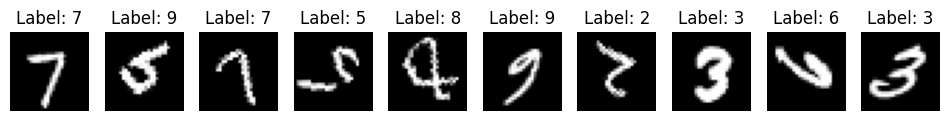

In [66]:
# Fetch a single batch of images
images, labels = next(iter(test_loader_new))

# Display images from the batch
fig, axes = plt.subplots(1, 10, figsize=(12, 2.5))
for idx, ax in enumerate(axes):
    ax.imshow(images[idx].squeeze(), cmap='gray')  # Images are grayscale
    ax.title.set_text(f'Label: {labels[idx].item()}')
    ax.axis('off')
plt.show()

In [67]:
correct_count, all_count = 0, 0
for images,labels in test_loader_new:  # Iterate over the test dataset
    for i in range(len(labels)):
        with torch.no_grad():  # Temporarily set all requires_grad flag to false
            logps = model(images[i].view(1, 784))  # Compute the model output

        ps = torch.exp(logps)  # Calculate the probabilities for each class
        probab = list(ps.numpy()[0])  # Convert probabilities to numpy list
        pred_label = probab.index(max(probab))  # Find the predicted class label
        true_label = labels.numpy()[i]  # Extract the true class label
        if(true_label == pred_label):
            correct_count += 1  # Increment correct count if prediction is correct
        all_count += 1

print("Model Accuracy =", (correct_count/all_count))  # Print the accuracy of the model

Model Accuracy = 0.6634


Poor accuracy!

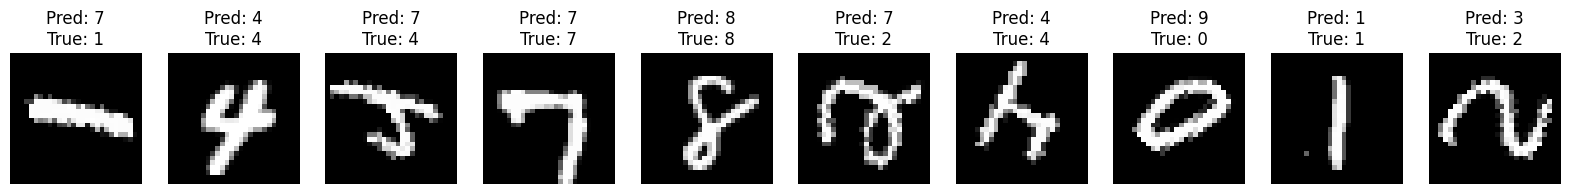

In [69]:
# Set the model to evaluation mode
model.eval()

# Choose a small number of images to display
images_to_display = 10
fig, axes = plt.subplots(1, images_to_display, figsize=(20, 4))

# Randomly select some images
images, labels = next(iter(test_loader_new))
predictions = torch.argmax(model(images), dim=1)

for i, ax in enumerate(axes):
    # Convert image tensor to numpy array and display it
    img = images[i].squeeze().numpy()  # Remove color channels for grayscale
    ax.imshow(img, cmap='gray')

    # Remove axes and set title with predicted and true labels
    ax.axis('off')
    ax.set_title(f'Pred: {predictions[i].item()}\nTrue: {labels[i].item()}')

plt.show()

## What are the limitations of MLPs?

1. **Handling of Spatial Data:**
MLPs do not inherently understand the spatial hierarchy in images or sequential information in time series data. Each input feature is treated independently, which can lead to suboptimal performance in tasks where the relationship between different parts of the data is important (e.g., image recognition, sequence modeling).
2. **Parameter Efficiency:** MLPs can become extremely parameter-heavy as the size of the input data and the number of layers increase. This is because every neuron in one layer is connected to every neuron in the next layer, leading to a large number of weights that need to be learned. This can result in overfitting if not managed properly with techniques like regularization or dropout.
3. **Scalability to High-Dimensional Data:**
The fully connected nature of MLPs means that the number of parameters grows quickly with the size of the input data, making MLPs less scalable to high-dimensional inputs such as high-resolution images. This is in contrast to architectures like CNNs, which are more parameter-efficient due to weight sharing.
4. **Computational Efficiency:** Due to the large number of parameters, MLPs can be computationally intensive to train and infer, especially as the network depth and the input dimensionality increase.
5. **Generalization to New Tasks:** MLPs might not generalize well across different tasks without significant retraining or architecture adjustments. They lack the modular design of some modern neural network architectures that allows for parts of the network to be reused across different tasks (e.g., transfer learning with CNNs).
6. **Sequential and Temporal Data Processing:** MLPs are not designed to handle sequences or temporal dependencies effectively. They treat each input independently and do not maintain any state information from one input to the next. This makes them ill-suited for tasks like natural language processing or time series forecasting, where RNNs or Transformers might be more appropriate.

For tasks that involve images, sequences, or high-dimensional data, other architectures like CNNs, RNNs, and Transformers are often more effective.

# **CNN**

<a title="Szymon Manduk, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:CNN-filter-animation-1.gif"><img width="512" alt="CNN-filter-animation-1" src="https://upload.wikimedia.org/wikipedia/commons/9/90/CNN-filter-animation-1.gif"></a>

## Filters and convolution

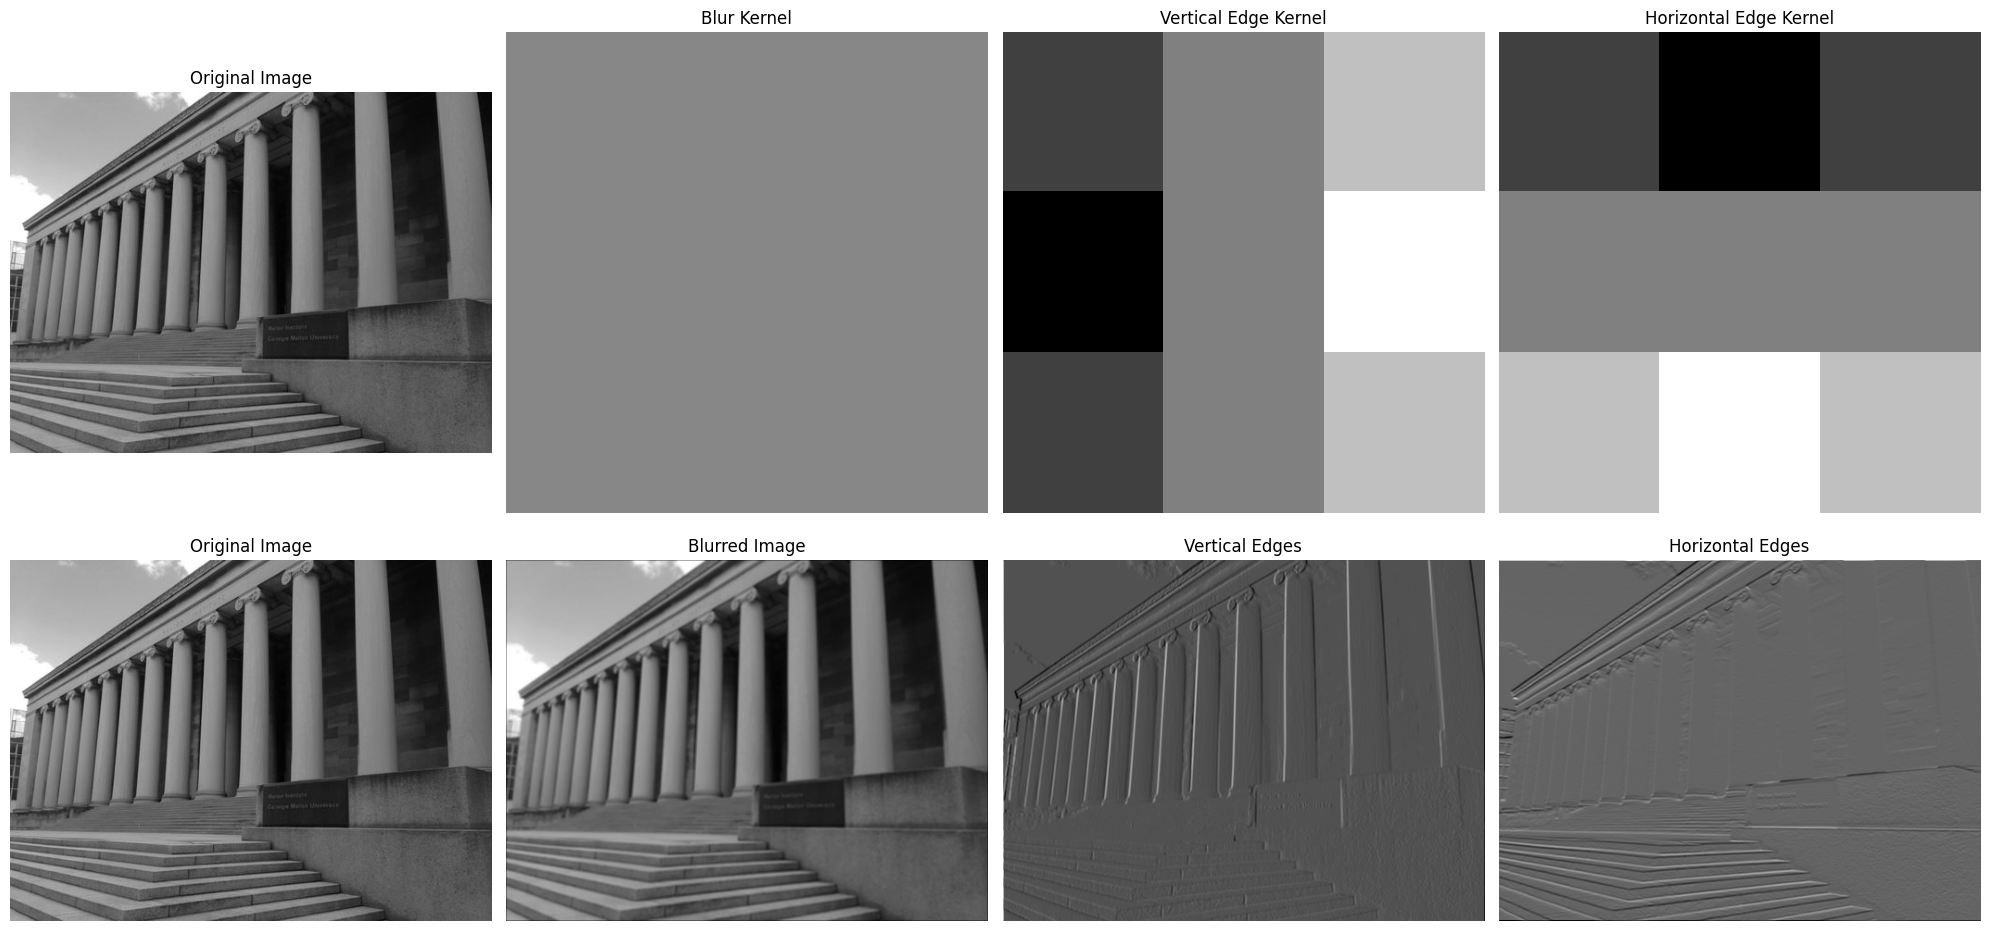

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def convolve2d(image, kernel):
    """
    Apply a 2D convolution operation to an image using the given kernel.
    """
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Prepare an empty image to store the result
    result = np.zeros_like(image)

    # Perform the convolution operation
    for i in range(image_height):
        for j in range(image_width):
            # Element-wise multiplication of the kernel and the image slice
            result[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])

    return result

# Load your grayscale image
image_path = 'mellon.jpg'  # Replace with your image path
image = mpimg.imread(image_path)

if image.ndim > 2:
    # Convert to grayscale if the image is RGB
    image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Define the filters
blur_kernel = np.ones((3, 3), np.float32) / 9
vertical_edge_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
horizontal_edge_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

# Apply the filters
blurred_image = convolve2d(image, blur_kernel)
vertical_edges = convolve2d(image, vertical_edge_kernel)
horizontal_edges = convolve2d(image, horizontal_edge_kernel)

# # Display the images
# fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# ax[0].imshow(image, cmap='gray')
# ax[0].set_title('Original Image')
# ax[1].imshow(blurred_image, cmap='gray')
# ax[1].set_title('Blurred Image')
# ax[2].imshow(vertical_edges, cmap='gray')
# ax[2].set_title('Vertical Edges')
# ax[3].imshow(horizontal_edges, cmap='gray')
# ax[3].set_title('Horizontal Edges')

# for a in ax:
#     a.axis('off')

# plt.show()
# Display the filters and the images
fig, ax = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted for an additional row

# Display the filters
filter_titles = ['Original Image', 'Blur Kernel', 'Vertical Edge Kernel', 'Horizontal Edge Kernel']
for i, kernel in enumerate([np.zeros((3, 3)), blur_kernel, vertical_edge_kernel, horizontal_edge_kernel]):
    if i == 0:
        ax[0, i].imshow(image, cmap='gray')
    else:
        ax[0, i].imshow(kernel, cmap='gray', vmin=-2, vmax=2)  # Use coolwarm to better show positive and negative values
    ax[0, i].set_title(filter_titles[i])
    ax[0, i].axis('off')

# Display the images
image_titles = ['Original Image', 'Blurred Image', 'Vertical Edges', 'Horizontal Edges']
images = [image, blurred_image, vertical_edges, horizontal_edges]
for i, img in enumerate(images):
    ax[1, i].imshow(img, cmap='gray')
    ax[1, i].set_title(image_titles[i])
    ax[1, i].axis('off')

plt.tight_layout()
plt.show()

Using inbuilt libraries

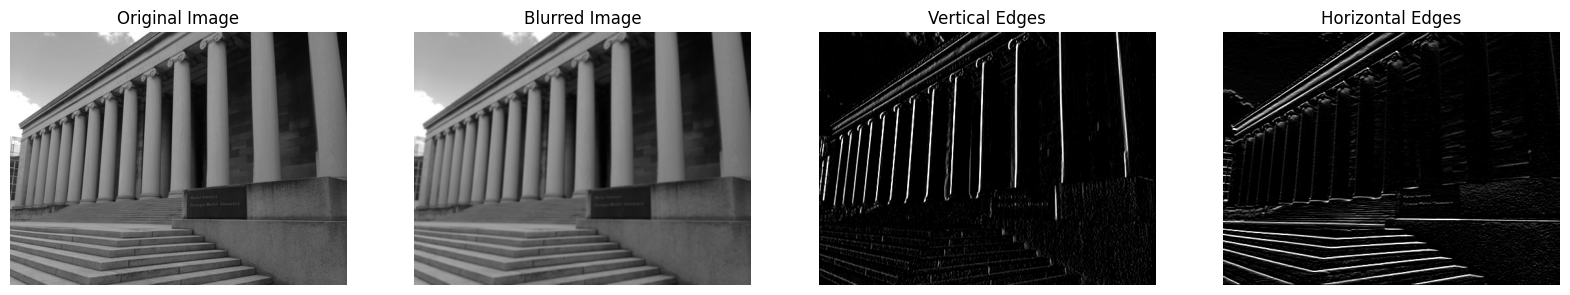

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load your image (replace 'your_image_path.jpg' with the actual file path)
image = cv2.imread('mellon.jpg', cv2.IMREAD_GRAYSCALE)

# Define the filters
blur_kernel = np.ones((3, 3), np.float32) / 9
vertical_edge_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
horizontal_edge_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

# Apply the filters
blurred_image = cv2.filter2D(image, -1, blur_kernel)
vertical_edges = cv2.filter2D(image, -1, vertical_edge_kernel)
horizontal_edges = cv2.filter2D(image, -1, horizontal_edge_kernel)

# Display the images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(blurred_image, cmap='gray')
ax[1].set_title('Blurred Image')
ax[2].imshow(vertical_edges, cmap='gray')
ax[2].set_title('Vertical Edges')
ax[3].imshow(horizontal_edges, cmap='gray')
ax[3].set_title('Horizontal Edges')

for a in ax:
    a.axis('off')

plt.show()


## **Implementing a CNN**

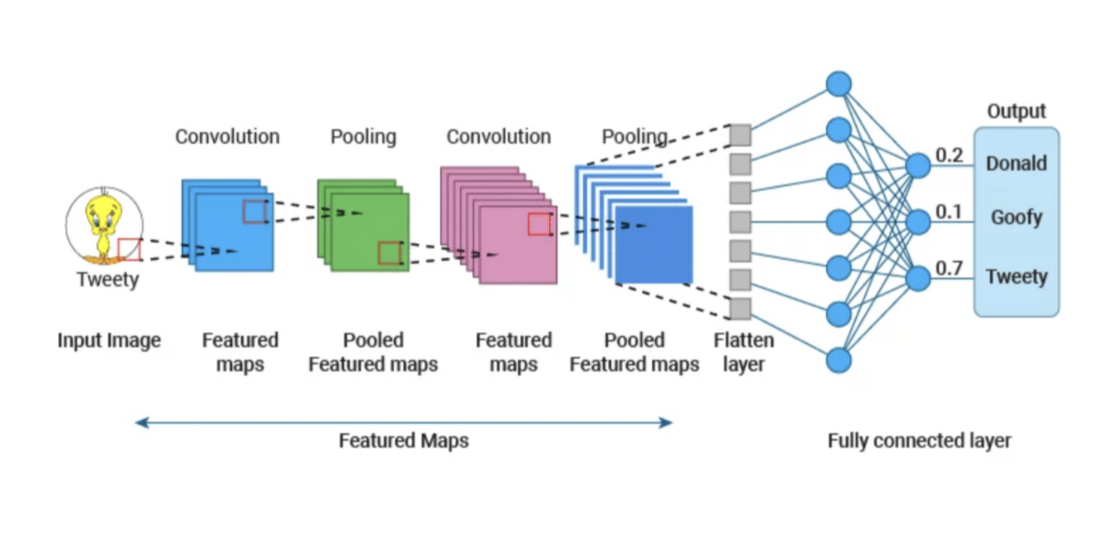

Image source: https://www.dropbox.com/scl/fi/fwxlmvvo4lp5ae9dv3yy3/3a.CNN-Basics_Annotated.pdf?rlkey=s2ecgcv9nb2g3wn1avx6qfuu4&dl=0

1. Import Necessary Libraries

In [9]:
import torch  # Main PyTorch library, provides data structures for multi-dimensional tensors and mathematical operations
import torchvision  # Provides popular datasets, model architectures, and common image transformations for computer vision
import torchvision.transforms as transforms  # Provides common image transformations
from torch.utils.data import DataLoader  # Provides an iterable over the given dataset, for batching, sampling, etc.
import torch.nn as nn  # Provides the building blocks for creating neural networks
import torch.nn.functional as F  # Provides functions like activation functions and convolution operations
import torch.optim as optim  # Provides optimization algorithms like SGD, Adam, etc.
import matplotlib.pyplot as plt

2. Load and Prepare Data

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL images or numpy arrays to torch.FloatTensor of shape (C x H x W) and normalize [0, 1]
    transforms.Normalize((0.5,), (0.5,)),  # Normalize a tensor image with mean and standard deviation (for each channel)
])

# DataLoader for training data
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# DataLoader for test data
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 429878625.28it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 33061051.81it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 157476407.69it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 15615187.51it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



3. Define the CNN model

In [3]:
class Net(nn.Module):  # Define a class Net inheriting from nn.Module
    def __init__(self):
        super(Net, self).__init__()  # Call the init method of nn.Module
        # Define convolutional layer 1: input channels=1, output channels=10, kernel size=5x5
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) # Produces 10 feature maps of size 24*24 (28 - 5 + 1)
        # Define convolutional layer 2: input channels=10, output channels=20, kernel size=5x5
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()  # Apply dropout to convolutional layer 2 to prevent overfitting
        self.fc1 = nn.Linear(320, 50)  # Define fully connected layer 1
        self.fc2 = nn.Linear(50, 10)  # Define fully connected layer 2

    def forward(self, x):
        # Apply the first convolutional layer, followed by max pooling with a 2x2 window and ReLU activation function
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) # 2x2 window --> op is 12x12
        # Apply the second convolutional layer with dropout, followed by max pooling and ReLU
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2)) # op is 20 feature maps of dim 8x8 --> 4x4
        x = x.view(-1, 320)  # Flatten the tensor for the fully connected layers
        x = F.relu(self.fc1(x))  # Apply the first fully connected layer with ReLU
        x = F.dropout(x, training=self.training)  # Apply dropout during training
        x = self.fc2(x)  # Apply the second fully connected layer
        return F.log_softmax(x, dim=1)  # Apply log softmax to the output

How did we get 320?

What are stride and padding?

*Stride > 1:* The filter skips pixels. For example, with a stride of 2, the filter moves two pixels at a time.

*Padding to preserve spatial dimensions:* Without padding, each convolution operation reduces the size of the output feature map compared to the input. Padding can be added to ensure that the output feature map retains the same spatial dimensions as the input.

*Padding to include edge information:* Without padding, pixels on the edge of the input would be processed less frequently than pixels in the center (since the filter might not fully cover them at the edges). Padding ensures that edge pixels are adequately considered, allowing the model to better learn features from the edges of the input.

4. Instantiate the Model, Define Loss Function and Optimizer

In [4]:
model = Net()  # Create an instance of the Net class
criterion = nn.CrossEntropyLoss()  # Define the loss function (cross-entropy loss for classification)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)  # Define the optimizer (Stochastic Gradient Descent)

5. Train the model

In [5]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()  # Set the model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):  # Loop over each batch
        data, target = data.to(device), target.to(device)  # Move data to the device (CPU or GPU)
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        output = model(data)  # Forward pass: compute the output
        loss = criterion(output, target)  # Compute the loss
        loss.backward()  # Backward pass: compute the gradient of the loss wrt parameters
        optimizer.step()  # Perform a single optimization step (parameter update)
        if batch_idx % 100 == 0:  # Log training loss every 100 batches
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model.to(device)  # Move the model to the configured device

for epoch in range(1, 11):  # Loop over the dataset multiple times (10 epochs)
    train(model, device, train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293957
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.226574
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.814835
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.096761
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.171309
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.780805
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.501999
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.449462
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.355760
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.628078
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.419622
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.260523
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.394105
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.429318
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.343211
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.827973
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.455528
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.263839
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.381929
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.178720
Train Epoch:

6. Evaluate the model

In [6]:
def test(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():  # Inference mode, gradient calculation is disabled
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)  # Average loss
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

test(model, device, test_loader)


Test set: Average loss: 0.0009, Accuracy: 9819/10000 (98%)



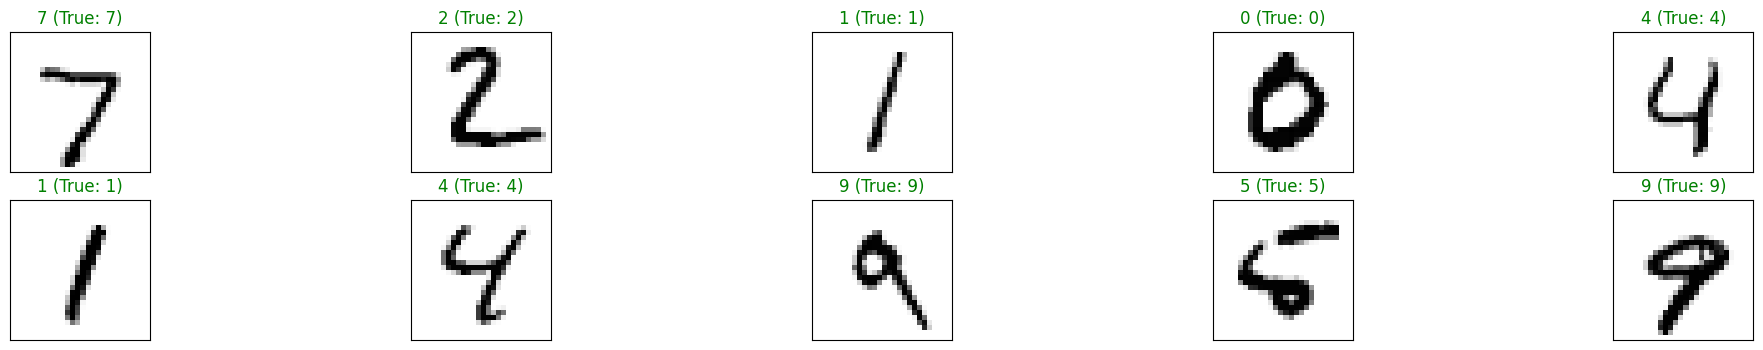

In [12]:
def visualize_predictions(model, device, data_loader, num_images=10):
    model.eval()  # Set the model to evaluation mode
    images, labels = next(iter(data_loader))
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    _, predicted = torch.max(output, 1)

    # Plot the images and their labels
    fig = plt.figure(figsize=(25, 4))
    for idx in range(int(num_images)):
        ax = fig.add_subplot(2, int(num_images/2), idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx].cpu(), one_channel=True)
        ax.set_title(f"{predicted[idx].item()} (True: {labels[idx].item()})", color=("green" if predicted[idx]==labels[idx] else "red"))

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Assuming `device` is already defined (e.g., as "cuda" or "cpu")
visualize_predictions(model, device, test_loader, num_images=10)

What if we rotate the images?

In [16]:
# Define a transformation pipeline with conditional rotation
transform_new = transforms.Compose([
     # 50% chance to rotate each image
    transforms.ToTensor(),
    transforms.RandomApply([
        transforms.RandomRotation(degrees=(0, 180))
    ], p=0.5),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the test data
test_set_new = torchvision.datasets.MNIST('', download=True, train=False, transform=transform_new)
test_loader_new = DataLoader(test_set_new, batch_size=64, shuffle=True)

def test(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():  # Inference mode, gradient calculation is disabled
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)  # Average loss
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

test(model, device, test_loader_new)


Test set: Average loss: 0.0303, Accuracy: 6985/10000 (70%)



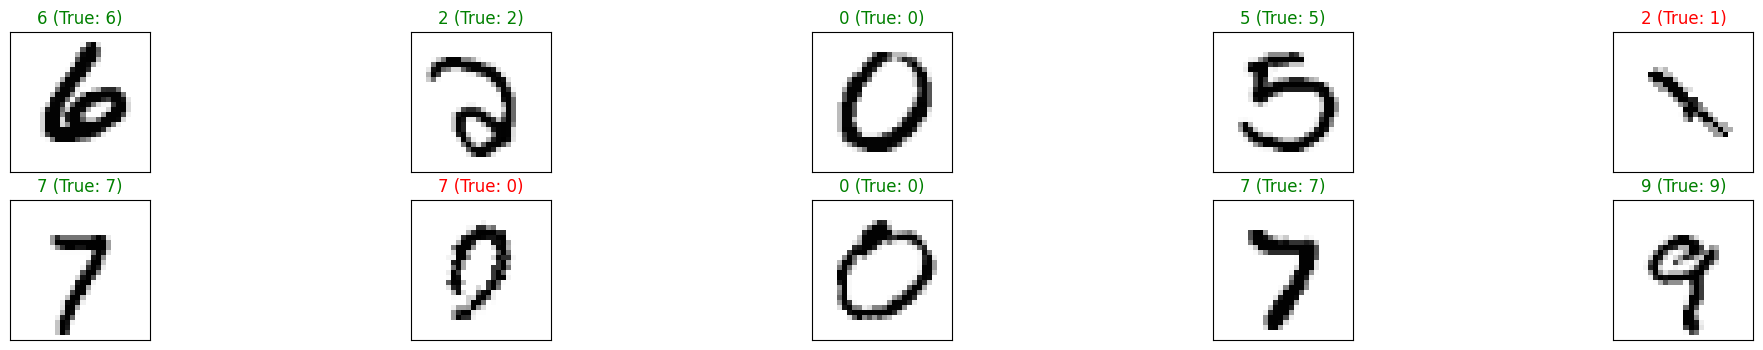

In [17]:
visualize_predictions(model, device, test_loader_new, num_images=10)

Why doesn't performance improve compared to MLP?

## Colored Images

CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class.

Files already downloaded and verified
Files already downloaded and verified
[1, 2000] loss: 2.204
[1, 4000] loss: 1.870
[1, 6000] loss: 1.654
[1, 8000] loss: 1.562
[1, 10000] loss: 1.483
[1, 12000] loss: 1.440
[2, 2000] loss: 1.379
[2, 4000] loss: 1.337
[2, 6000] loss: 1.337
[2, 8000] loss: 1.319
[2, 10000] loss: 1.292
[2, 12000] loss: 1.284
[3, 2000] loss: 1.205
[3, 4000] loss: 1.200
[3, 6000] loss: 1.200
[3, 8000] loss: 1.198
[3, 10000] loss: 1.186
[3, 12000] loss: 1.179
[4, 2000] loss: 1.106
[4, 4000] loss: 1.091
[4, 6000] loss: 1.116
[4, 8000] loss: 1.111
[4, 10000] loss: 1.126
[4, 12000] loss: 1.109
[5, 2000] loss: 1.037
[5, 4000] loss: 1.035
[5, 6000] loss: 1.052
[5, 8000] loss: 1.048
[5, 10000] loss: 1.045
[5, 12000] loss: 1.043
Finished Training
Accuracy of the network on the 10000 test images: 61.68%
GroundTruth:  cat ship ship plane
Predicted:  cat car car plane


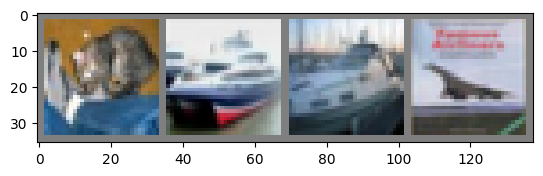

In [26]:
# Step 1: Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First convolutional layer: 3 input channels (RGB), 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # First fully connected layer: 16*5*5 input features (from conv2), 120 output features
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Second fully connected layer: 120 input features, 84 output features
        self.fc2 = nn.Linear(120, 84)
        # Third (output) fully connected layer: 84 input features, 10 output features (for 10 classes)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Apply conv1 with relu activation, followed by 2x2 max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # Apply conv2 with relu activation, followed by 2x2 max pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, self.num_flat_features(x))
        # Apply fc1 with relu activation
        x = F.relu(self.fc1(x))
        # Apply fc2 with relu activation
        x = F.relu(self.fc2(x))
        # Apply fc3 to get final output
        x = self.fc3(x)
        return x

    # Helper function to calculate the number of flat features
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert from Tensor image

# Step 3: Load and normalize the CIFAR-10 training and test datasets using torchvision
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] range
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Step 4: Define a loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is suitable for classification tasks
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # Use SGD with momentum

# Step 5: Train the network
for epoch in range(5):  # Loop over the dataset multiple times (2 epochs for demo)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass + optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

# Step 6: Show some of the test images with their predicted and true labels
images, labels = next(iter(testloader))

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Predict labels
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))